In [1]:
import json
import pdal
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

In [2]:
input_path = "./data/input/09LD1895.las"
output_path = "./data/output/09LD1895_dem.tif"

In [3]:
pipeline_json = {
    "pipeline": [
        {
            "type": "readers.las",
            "filename": input_path
        },
        {
            "type": "filters.smrf",
            "window": 50, # 除去したいオブジェクトの大きさ（m）
            "slope": 0.2, # 傾斜の閾値
            "threshold": 0.45, # 高度の閾値（m）
            "cell": 1 # 解像度（m）
        },
        {
            "type": "filters.range",
            "limits": "Classification[2:2]"
        },
        {
            "type": "writers.gdal",
            "filename": output_path,
            "output_type": "mean",
            "resolution": 1.0,
            "radius": 1.0,
            "nodata": -9999
        }
    ]
}

In [4]:
pipeline_definition = json.dumps(pipeline_json)

In [5]:
pipeline = pdal.Pipeline(pipeline_definition)
pipeline.execute()

1925787

In [6]:
with rasterio.open(output_path) as src:
    dem_data = src.read(1, masked=True) # nodataをマスクして読み込む
    transform = src.transform

In [7]:
ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.hillshade(
    dem_data,
    vert_exag=1,
    dx=transform.a,
    dy=-transform.e
)

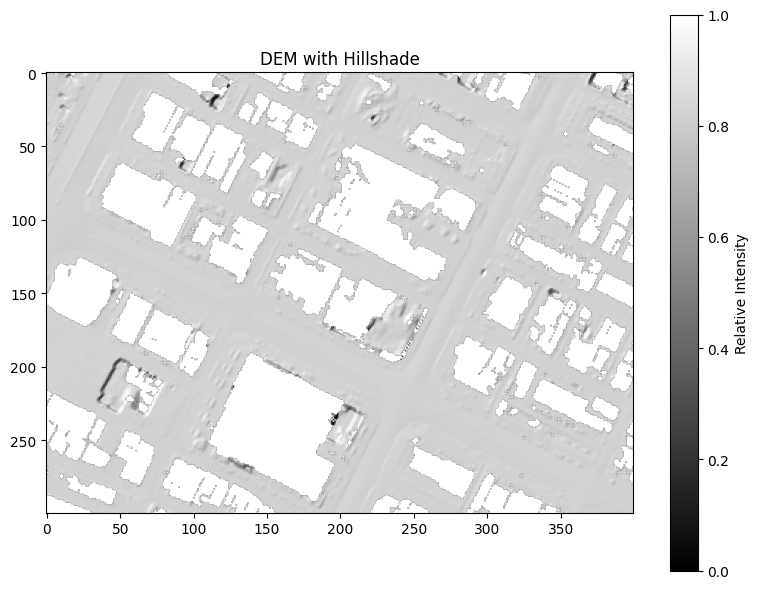

In [8]:
plt.figure(figsize=(8, 6))
plt.title("DEM with Hillshade")
plt.imshow(hillshade, cmap='gray')
plt.colorbar(label="Relative Intensity")
plt.tight_layout()
plt.show()